<a href="https://colab.research.google.com/github/ShinHyun-soo/DLstudy/blob/main/imgClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/dataset/fruit_1"

Apple  Banana


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/dataset/fruit_1",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/dataset/fruit_1",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 786 images belonging to 2 classes.
Found 196 images belonging to 2 classes.


In [ ]:
def create_model():
  inputs  = Input(shape=(64, 64, 3))

  conv_1 = Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
  pool_1 = MaxPooling2D((2,2))(conv_1)
  conv_2 = Conv2D(32, (3, 3), padding='same', activation='relu')(conv_1)
  pool_2 = MaxPooling2D((2,2))(conv_2)
  drop_2 = Dropout(0.25)(pool_2)
  flat_1 = Flatten()(drop_2)
  fc_1 = Dense(16)(flat_1)

  outputs = Dense(2, activation='softmax')(fc_1)
  model = Model (inputs=inputs, outputs=outputs)
  return model

In [ ]:
_model_1 = create_model()
_model_1.summary()
_model_1.compile(loss='categorical_crossentropy',
                 optimizer='adam',
                 metrics=['accuracy'])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                           

In [ ]:
history = _model_1.fit_generator(
    train_generator,
    epochs=5,
    steps_per_epoch=72,
    validation_data=validation_generator,
    validation_steps=72
)

<ipython-input-41-a16f29b10971>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = _model_1.fit_generator(


Epoch 1/5
25/72 [=========>....................] - ETA: 4s - loss: 0.6841 - accuracy: 0.8448

72/72 [==============================] - 4s 41ms/step - loss: 0.6841 - accuracy: 0.8448 - val_loss: 0.0044 - val_accuracy: 1.0000


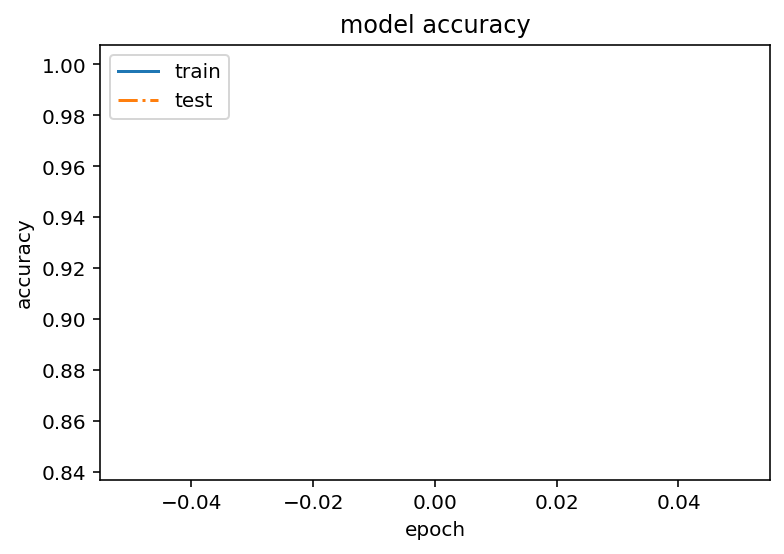

In [ ]:
plt.plot(history.history['accuracy'], '-')
plt.plot(history.history['val_accuracy'], '-.')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
%config InlineBackend.figure_format = 'retina'

In [ ]:
test_generator = train_datagen.flow_from_directory(
    "/content/drive/My Drive/dataset/fruit_2",
    target_size=(64, 64),
    batch_size=32,
    class_mode=None,

    shuffle=False
)

Found 492 images belonging to 1 classes.


In [ ]:
probs = _model_1.predict_generator(test_generator)

<ipython-input-44-ef4395743b58>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  probs = _model_1.predict_generator(test_generator)


In [ ]:
import numpy as np
pred = np.argmax(probs, axis=1)

In [ ]:
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1]


In [48]:
_model_1.save("model.h5")

In [49]:
from keras.models import load_model

_model_2 = load_model('model.h5')
_model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                           